In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rcParams['image.cmap'] = 'gist_earth'

In [2]:
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util
from tf_unet import image_util

C:\Users\sunny\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
nx = 512
ny = 512

In [ ]:
generator = image_gen.GrayScaleDataProvider(nx, ny, r_min = 1, r_max = 20,border=20,v_min=10,v_max=200, cnt=20)

In [ ]:
x_test, y_test = generator(1)

In [ ]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")

In [4]:
data_provider = image_util.ImageDataProvider("IRholder\ImageResize\*.png",data_suffix=".png", mask_suffix='_label.png')

Number of files used: 1730


In [5]:
x,y = data_provider(1)

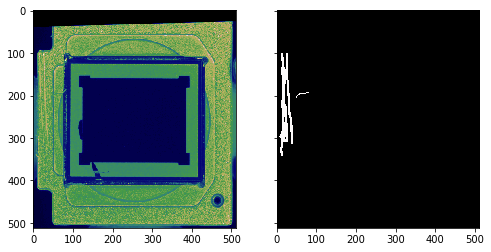

In [6]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(x[0,...,0], aspect="auto")
ax[1].imshow(y[0,...,1], aspect="auto")

In [7]:
#net = unet.Unet(channels=1, n_class=2, layers=8, features_root=16)
#net = unet.Unet(channels=1, n_class=2, layers=4, features_root=16,cost_kwargs={'regularizer':0.00001,'class_weights':[1,2]})
net = unet.Unet(channels=1, n_class=2, layers=4, features_root=64)

2018-06-04 20:00:01,739 Layers 4, features 64, filter size 3x3, pool size: 2x2


Tensor("ImageReshape/strided_slice:0", shape=(), dtype=int32) Tensor("ImageReshape/strided_slice_1:0", shape=(), dtype=int32)
down size: 256.0
down size: 128.0
down size: 64.0
down size: 64.0
up size: 128.0
up size: 256.0
up size: 512.0


In [8]:
#trainer = unet.Trainer(net,batch_size=1, optimizer="adam",opt_kwargs=dict(learning_rate=0.00001))
trainer = unet.Trainer(net, batch_size=5,optimizer="momentum", opt_kwargs=dict(momentum=0.99,learning_rate=0.0001))

In [ ]:
path = trainer.train(data_provider, "./unet_trained", training_iters=32, epochs=100,dropout=0.5, display_step=2,write_graph = False,restore=False)

2018-06-04 20:00:04,920 Removing 'D:\pythonworkspace\tf_unet\tf_unet\demo\prediction'
2018-06-04 20:00:04,927 Removing 'D:\pythonworkspace\tf_unet\tf_unet\demo\unet_trained'
2018-06-04 20:00:04,942 Allocating 'D:\pythonworkspace\tf_unet\tf_unet\demo\prediction'
2018-06-04 20:00:04,944 Allocating 'D:\pythonworkspace\tf_unet\tf_unet\demo\unet_trained\model'
2018-06-04 20:00:10,060 Verification error= 1.3%, loss= 0.6931
2018-06-04 20:00:11,224 Start optimization
2018-06-04 20:00:17,808 Iter 0, Minibatch Loss= 0.6931, Training Accuracy= 0.9949, Minibatch error= 0.5%
2018-06-04 20:00:23,156 Iter 2, Minibatch Loss= 0.6931, Training Accuracy= 0.9936, Minibatch error= 0.6%
2018-06-04 20:00:28,593 Iter 4, Minibatch Loss= 0.6930, Training Accuracy= 0.9902, Minibatch error= 1.0%
2018-06-04 20:00:33,885 Iter 6, Minibatch Loss= 0.6930, Training Accuracy= 0.9867, Minibatch error= 1.3%
2018-06-04 20:00:39,243 Iter 8, Minibatch Loss= 0.6930, Training Accuracy= 0.9951, Minibatch error= 0.5%
2018-06-04 

2018-06-04 20:06:35,417 Iter 136, Minibatch Loss= 0.6012, Training Accuracy= 0.9959, Minibatch error= 0.4%
2018-06-04 20:06:40,757 Iter 138, Minibatch Loss= 0.5995, Training Accuracy= 0.9914, Minibatch error= 0.9%
2018-06-04 20:06:46,121 Iter 140, Minibatch Loss= 0.5980, Training Accuracy= 0.9866, Minibatch error= 1.3%
2018-06-04 20:06:51,462 Iter 142, Minibatch Loss= 0.5934, Training Accuracy= 0.9955, Minibatch error= 0.4%
2018-06-04 20:06:57,079 Iter 144, Minibatch Loss= 0.5918, Training Accuracy= 0.9921, Minibatch error= 0.8%
2018-06-04 20:07:02,537 Iter 146, Minibatch Loss= 0.5883, Training Accuracy= 0.9964, Minibatch error= 0.4%
2018-06-04 20:07:08,079 Iter 148, Minibatch Loss= 0.5854, Training Accuracy= 0.9970, Minibatch error= 0.3%
2018-06-04 20:07:13,378 Iter 150, Minibatch Loss= 0.5831, Training Accuracy= 0.9952, Minibatch error= 0.5%
2018-06-04 20:07:18,773 Iter 152, Minibatch Loss= 0.5818, Training Accuracy= 0.9901, Minibatch error= 1.0%
2018-06-04 20:07:24,068 Iter 154, Min

In [ ]:
data_provider1 = image_util.ImageDataProvider("IRholder\ImageResize\*.png",data_suffix=".png", mask_suffix='_label.png')
x_test, y_test = data_provider1(40) 
prediction = net.predict("./unet_trained/model/model.cpkt", x_test)

In [ ]:
#import scipy.misc
#for i in range(3000):
#    x_test, y_test = generator(1)    
#    scipy.misc.imsave('./unet_trained/test%s.png'%i, x_test[...].reshape(64,64))
#    scipy.misc.imsave('./unet_trained/test%s_label.png'%i, y_test[...,1].reshape(64,64))
x_test, y_test = generator(20) 
prediction = net.predict("./unet_trained/model/model.cpkt", x_test)

In [ ]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
x_test = util.crop_to_shape(x_test,prediction.shape)
y_test = util.crop_to_shape(y_test,prediction.shape)
n=15
ax[0].imshow(x_test[n,...,0], cmap = 'gray', aspect="auto")
ax[1].imshow(y_test[n,...,1], aspect="auto")

mask = prediction[n,...,1]
from PIL import Image

result = Image.fromarray((mask * 255).astype(np.uint8))
result.save('../docs/out.bmp')
print(mask.shape)
print(mask.max(),mask.min())
#maximum = mask.max()*0.5 

#mask = mask > maximum
'''
print(x_test[0,...,0].shape)
print(y_test[0,...,1].shape)
def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 10)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value
    return vector
mask = np.pad(mask,72,pad_with,padder=0)

mask = mask
'''
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()
fig.savefig("../docs/toy_problem.png")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
heatMap = prediction[n,...,1]
#heatMap= heatMap*(heatMap>0.34  )
sns.set()
ax = sns.heatmap(heatMap, vmin=0, vmax=1)
plt.show()